## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mouse_data["Mouse ID"]))
print(f"Number of Mice: {number_of_mice}")


Number of Mice: 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#Create a list of duplicate Mouse ID
#duplicate_mice_row = list(duplicate_mice.index.values)
#duplicate_mice_row

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_data.drop(mouse_data.index[])
mouse_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(pd.unique(mouse_clean_df["Mouse ID"]))
print(f"Number of Mice: {number_of_mice}")

Number of Mice: 249


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mouse_clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])
drug_mean = drug_group["Tumor Volume (mm3)"].mean()
drug_median = drug_group["Tumor Volume (mm3)"].median()
drug_variance = drug_group["Tumor Volume (mm3)"].var()
drug_standv = drug_group["Tumor Volume (mm3)"].std()
drug_sem = drug_group["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary dataframe.
resulting_summary_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_variance, "Standard Deviation": drug_standv, "SEM": drug_sem})
resulting_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_agg_summary = mouse_clean_df.groupby("Drug Regimen").agg(
    Mean = ("Tumor Volume (mm3)", "mean"), 
    Median = ("Tumor Volume (mm3)", "median"),
    Variance = ("Tumor Volume (mm3)", "var"),
    Standard_Deviation = ("Tumor Volume (mm3)", "std"),
    SEM = ("Tumor Volume (mm3)", "sem"))

tumor_agg_summary

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

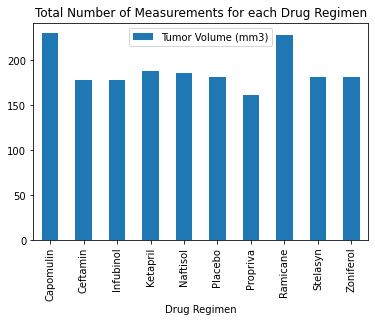

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = pd.DataFrame(drug_regimen.count())

#Creating type of graph with titile 
total_measurements.plot(kind = "bar", title = "Total Number of Measurements for each Drug Regimen")
plt.show()


ConversionError: Failed to convert value(s) to axis units: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

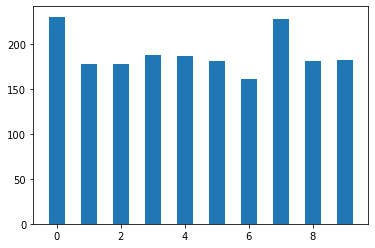

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurement_pyplot = total_measurements["Tumor Volume (mm3)"].tolist()
x_axis = np.arange(len(total_measurement_pyplot))
bars = plt.bar(x_axis, total_measurement_pyplot, width = .5) 
#Add values
drug_names = list(total_measurements.index.values)
plt.xticks(drug_names, rotation = "vertical")
plt.show()


In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = mouse_clean_df.drop_duplicates(subset=["Mouse ID"])
gender_count = pd.DataFrame(mice_gender[["sex", "Mouse ID"]].groupby(["Sex"]).count())

#Label Pie Chart
#gender_pie = gender_count.plot(kind = "pie", y = "Mouse ID", title = "Female verus Male distribution", autopct = "%1.3f%%")
#gender_pie.set_ylabel("")
#plt.show()

KeyError: "['sex'] not in index"

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'tumor volume vs. time point for mouse with Capomulin')

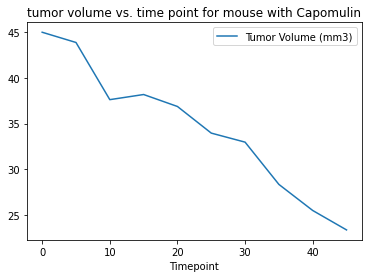

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = mouse_clean_df[mouse_clean_df["Mouse ID"] == "s185"]
capo_mouse.plot(kind="line", x = "Timepoint", y= "Tumor Volume (mm3)")
plt.title ("tumor volume vs. time point for mouse with Capomulin")

Text(0.5, 1.0, 'average tumor volume vs. mouse weight for the Capomulin regimen')

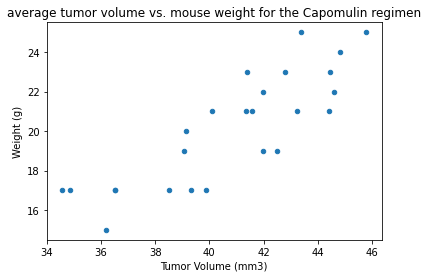

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse_scatter = mouse_clean_df[mouse_clean_df["Drug Regimen"] == "Capomulin"]
capo_mice = capo_mouse_scatter.groupby(["Mouse ID"]).mean()
capo_mice.plot(kind="scatter", x= "Tumor Volume (mm3)", y= "Weight (g)")
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")

## Correlation and Regression

0.8419363424694718


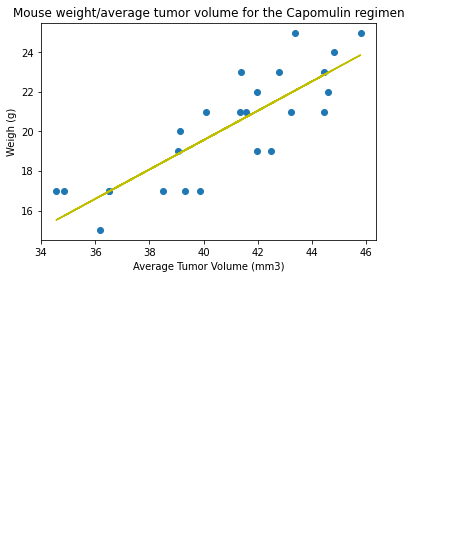

In [69]:
# Calculate the correlation coefficient and linear regression model 
xvalues = capo_mice["Tumor Volume (mm3)"]
yvalues = capo_mice["Weight (g)"]
(slope, intercept, rvalue,pvalue, stderr) = st.linregress(x=xvalues, y=yvalues)
regression = xvalues * slope + intercept 
correlation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regression, "y-")

# add labels for mouse weight and average tumor volume for the Capomulin regimen
plt. annotate(correlation, (40,0), fontsize=25, color="yellow")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weigh (g)")
plt.title("Mouse weight/average tumor volume for the Capomulin regimen")
print(rvalue)



